In [1]:
%load_ext autoreload
%autoreload 2

import pyscisci.all as pyscisci

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
try:
    import seaborn as sns
    sns.set_style('white')
except:
    pass

%matplotlib inline

In [2]:
path2mag = '/Volumes/GatesExpansionDrive/DataSets/MAG'
path2dblp = '/Volumes/GatesExpansionDrive/DataSets/DBLP'
path2aps = '/Volumes/GatesExpansionDrive/DataSets/APS/APS2019'


dblp_color = sns.color_palette()[0]
aps_color = sns.color_palette()[1]
mag_color = sns.color_palette()[2]

In [3]:

myaps = pyscisci.APS(path2aps)
apspubs = myaps.load_publications(columns=['PublicationId', 'Year', 'JournalId'])

npubs_aps = apspubs.groupby('Year')['PublicationId'].nunique()
njournals_aps = apspubs.groupby('Year')['JournalId'].nunique()

In [4]:
mydblp = pyscisci.DBLP(path2dblp)
dblppubs = mydblp.load_publications(columns=['PublicationId', 'Year', 'JournalId'])
pub2year = {pid:y for pid, y in dblppubs[['PublicationId', 'Year']].values}

npubs_dblp = dblppubs.groupby('Year')['PublicationId'].nunique()
njournals_dblp = dblppubs.groupby('Year')['JournalId'].nunique()

dblpauthors = mydblp.load_publicationauthor(columns=['PublicationId', 'AuthorId'],
                                                      duplicate_subset=['PublicationId', 'AuthorId'])
#pub2year = mydblp.pub2year
dblpauthors['Year'] = [pub2year.get(pid, None) for pid in dblpauthors['PublicationId'].values]
dblpauthors.dropna(inplace=True)

nauthors_dblp = dblpauthors.groupby('Year')['AuthorId'].nunique()

In [5]:
mymag = pyscisci.MAG(path2mag)
magpubs = mymag.load_publications(columns=['PublicationId', 'Year', 'JournalId'])
pub2year = {pid:y for pid, y in magpubs[['PublicationId', 'Year']].values}

npubs_mag = magpubs.groupby('Year')['PublicationId'].nunique()
njournals_mag = magpubs.groupby('Year')['JournalId'].nunique()


In [6]:
magauthors = mymag.load_publicationauthoraffiliation(columns=['PublicationId', 'AuthorId'],
                                                      duplicate_subset=['PublicationId', 'AuthorId'])
#pub2year = mydblp.pub2year
magauthors['Year'] = [pub2year.get(pid, None) for pid in magauthors['PublicationId'].values]
magauthors.dropna(inplace=True)

nauthors_mag = magauthors.groupby('Year')['AuthorId'].nunique()



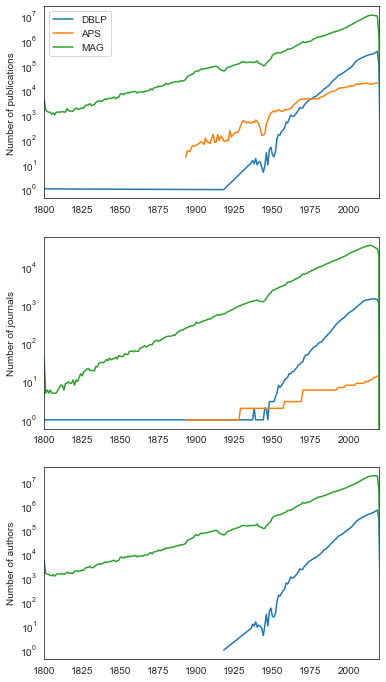

In [14]:

fig, ax = plt.subplots(3, 1, figsize=(6, 12))

ax[0].plot(npubs_dblp.index.values, npubs_dblp.values, color=dblp_color, label='DBLP')
ax[1].plot(njournals_dblp.index.values, njournals_dblp.values, color=dblp_color)
ax[2].plot(nauthors_dblp.index.values, nauthors_dblp.values, color=dblp_color)

ax[0].plot(npubs_aps.index.values, npubs_aps.values, color=aps_color, label='APS')
ax[1].plot(njournals_aps.index.values, njournals_aps.values, color=aps_color)


ax[0].plot(npubs_mag.index.values, npubs_mag.values, color=mag_color, label='MAG')
ax[1].plot(njournals_mag.index.values, njournals_mag.values, color=mag_color)
ax[2].plot(nauthors_mag.index.values, nauthors_mag.values, color=mag_color)



ax[0].set_ylabel('Number of publications')
ax[1].set_ylabel('Number of journals')
ax[2].set_ylabel('Number of authors')

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels)

for iax in range(3):
    ax[iax].set_yscale('log')
    
    ax[iax].set_xlim([1800, 2020])
    

plt.savefig('DatabaseGrowth.pdf')
plt.show()